# Dataframes e Dataframes con dati mancanti 

In [12]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"età": 25, "punteggio": 90, "ammesso": 1},
    {"età": None, "punteggio": 85, "ammesso": 0},
    {"età": 28, "punteggio": None, "ammesso": 1},
    {"età": None, "punteggio": 75, "ammesso": 1},
    {"età": 23, "punteggio": None, "ammesso": None},
    {"età": 23, "punteggio": 77, "ammesso": None},
]
df = pd.DataFrame(dataset)
df

,età,punteggio,ammesso
0,25.0,90.0,1.0
1,NaN,85.0,0.0
2,28.0,NaN,1.0
3,NaN,75.0,1.0
4,23.0,NaN,NaN
5,23.0,77.0,NaN


In [3]:
df["punteggio"]

0    90.0
1    85.0
2     NaN
3    75.0
4     NaN
5    77.0
Name: punteggio, dtype: float64

In [19]:
#identificazione delle righe con dati mancanti
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
righe_con_dati_mancanti

,Variable1,Variable2,Missing_Column
2,3,NaN,A
4,5,NaN,NaN


In [21]:
#conta quante righe con dati mancanti ci sono in totale
totale_dati_mancanti = righe_con_dati_mancanti.shape[0]
totale_dati_mancanti

2

In [9]:
print("righe con dati mancanti:")
print(righe_con_dati_mancanti)
print("totale dati mancanti:", totale_dati_mancanti)

righe con dati mancanti:
    età  punteggio  ammesso
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN
totale dati mancanti: 5


In [17]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"nome": "Alice", "età": 25, "punteggio": 90, "email": "alice@email.com"},
    {"nome": "Bob", "età": 22, "punteggio": None, "email": None},
    {"nome": "Charlie", "età": 28, "punteggio": 75, "email": "charlie@email.com"},
]

# Converti il dataset in un DataFrame
df = pd.DataFrame(dataset)
df

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
1,Bob,22,NaN,None
2,Charlie,28,75.0,charlie@email.com


In [18]:
#rimuovi le righe con dati mancanti
df1=df.dropna(inplace=False)
df

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
1,Bob,22,NaN,None
2,Charlie,28,75.0,charlie@email.com


In [19]:
#rimuovi le righe con dati mancanti
df1=df.dropna(inplace=False)
df1

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
2,Charlie,28,75.0,charlie@email.com


In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Genera dati di esempio
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [1, 2, np.nan, 4, np.nan],
    'Missing_Column': ['A', 'B', 'A', 'C', np.nan]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df1=pd.DataFrame()
df

,Variable1,Variable2,Missing_Column
0,1,1.0,A
1,2,2.0,B
2,3,NaN,A
3,4,4.0,C
4,5,NaN,NaN


# Trattamento dei missing values

In [7]:
#trattamento dei missing values delle variabili numeriche
numeric_cols = df.select_dtypes(include=["number"])
df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean())

In [1]:
categorical_cols = df.select_dtypes(exclude=["number"])
df1[categorical_cols.columns]= df[categorical_cols.columns]fillna(df[categorical_cols.columns].mode().iloc[0])
print(f"il primo conn i valori mancanti \n{df}\ne il secondo con i missing values sostituiti \n{df1}")

.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,NaN,5.0


In [40]:
df.isnull().sum()
len(df)

5

In [39]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

Feature1    20.0
Feature2    40.0
Feature3    20.0
dtype: float64

In [8]:
#creo una funzione che si occupa solo dei missing values 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Genera dati di esempio
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [1, 2, np.nan, 4, np.nan],
    'Missing_Column': ['A', 'B', 'A', 'C', np.nan]
}

# Crea un DataFrame
df = pd.DataFrame(data)
df1=pd.DataFrame()


def missingvalues_sub(df):
    # Trattamento dei missing values nelle variabili numeriche e categoriche
    numeric_cols = df.select_dtypes(include=['number'])
    categorical_cols = df.select_dtypes(exclude=['number'])
    df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean())    
    df1[categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])
    return df1


def main ():
    df1=missingvalues_sub(df)
    print(f"il primo con i valori mancanti \n{df} \ne il secondo con i missing values sostituiti \n{df1}")


if __name__ == "__main__":
    main()

il primo con i valori mancanti 
   Variable1  Variable2 Missing_Column
0          1        1.0              A
1          2        2.0              B
2          3        NaN              A
3          4        4.0              C
4          5        NaN            NaN 
e il secondo con i missing values sostituiti 
   Variable1  Variable2 Missing_Column
0          1   1.000000              A
1          2   2.000000              B
2          3   2.333333              A
3          4   4.000000              C
4          5   2.333333              A


In [9]:
df.isnull()

,Variable1,Variable2,Missing_Column
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,True


In [10]:
pi

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}

# Crea un DataFrame
df = pd.DataFrame(data)

#Calcola la matrice di missing values
missing_matrix = df.isnull()
missing_matrix



,Feature1,Feature2,Feature3
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,False
4,False,True,False


# Heatmap

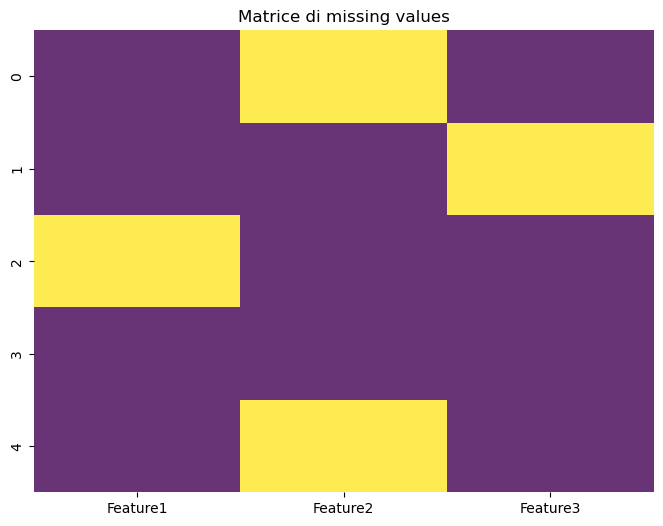

In [11]:
#Crea un heatmap colorata
plt.figure(figsize=(8, 6))
sns.heatmap(missing_matrix, cmap="viridis", cbar=False, alpha=0.8)
plt.title("Matrice di missing values")
plt.show()

In [12]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Genera dati casuali per l'esplorazione
np.random.seed(42)
data = {
    'Età': np.random.randint(18, 70, size=1000),
    'Genere': np.random.choice(['Maschio', 'Femmina'], size=1000),
    'Punteggio': np.random.uniform(0, 100, size=1000),
    'Reddito': np.random.normal(50000, 15000, size=1000)
}
df = pd.DataFrame(data)

#Visualizza le prime righe del dataset
print(df.head())
missing_matrix = df.isnull()
missing_matrix

   Età   Genere  Punteggio       Reddito
0   56  Maschio  85.120691  52915.764524
1   69  Maschio  49.514653  44702.505608
2   46  Maschio  48.058658  55077.257652
3   32  Femmina  59.240778  45568.978848
4   60  Maschio  82.468097  52526.914644


,Età,Genere,Punteggio,Reddito
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [22]:
#informazioni sul dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Età        1000 non-null   int32  
 1   Genere     1000 non-null   object 
 2   Punteggio  1000 non-null   float64
 3   Reddito    1000 non-null   float64
dtypes: float64(2), int32(1), object(1)
memory usage: 27.5+ KB
None


missing_data= df.isnull().sum()
print("valori mancanti per ciasciuna colonna:")
print(missing_data)

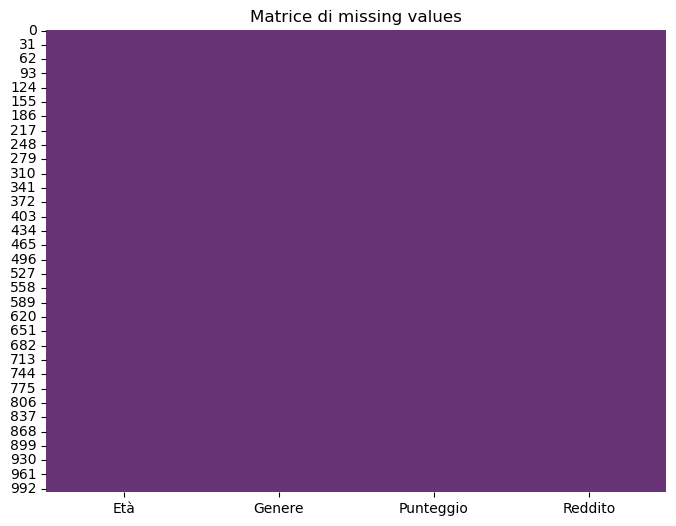

In [31]:
#Crea un heatmap colorata
plt.figure(figsize=(8, 6))
sns.heatmap(missing_matrix, cmap="viridis", cbar=False, alpha=0.8)
plt.title("Matrice di missing values")
plt.show()

In [34]:
import pandas as pd
import numpy as np

# Impostare il seed per rendere i risultati riproducibili
np.random.seed(41)

# Creare un dataframe vuoto
df = pd.DataFrame()

# Generare dati casuali
n_rows = 500
df['CatCol1'] = np.random.choice(['A', 'B', 'C'], size=n_rows)
df['CatCol2'] = np.random.choice(['X', 'Y'], size=n_rows)
df['NumCol1'] = np.random.randn(n_rows)
df['NumCol2'] = np.random.randint(1, 100, size=n_rows)
df['NumCol3'] = np.random.uniform(0, 1, size=n_rows)

# Calcolare il numero totale di missing values desiderati
total_missing_values = int(0.05 * n_rows * len(df.columns))

# Introdurre missing values casuali
for column in df.columns:
    num_missing_values = np.random.randint(0, total_missing_values + 1)
    missing_indices = np.random.choice(n_rows, size=num_missing_values, replace=False)
    df.loc[missing_indices, column] = np.nan

# Elimina le righe in cui entrambe le features categoriche hanno valori NaN
df = df.dropna(subset=["CatCol1", 'CatCol2'], how='all')


numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(exclude=['number'])

# Sostituisci i missing values nelle colonne categoriche con la moda utilizzando .loc
df.loc[:, categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])

# Calcola la media condizionata solo per le colonne numeriche con dati mancanti
conditional_means = df[numeric_cols.columns].fillna(df.groupby('CatCol1')[numeric_cols.columns].transform('mean'))

# Aggiorna le colonne numeriche con la media condizionata utilizzando .loc
df.loc[:, numeric_cols.columns] = conditional_means

# Stampa il DataFrame risultante
print(df)

    CatCol1 CatCol2   NumCol1    NumCol2   NumCol3
0         A       X -1.442281  50.728571  0.154194
1         A       Y  1.212341   4.000000  0.067115
2         C       Y  1.574474  18.000000  0.476050
3         B       X  0.402019  23.000000  0.526320
4         B       Y  0.897322  65.000000  0.063328
..      ...     ...       ...        ...       ...
495       C       X -2.404308  10.000000  0.621247
496       B       X  0.645468  53.956522  0.472152
497       B       Y -0.544530   9.000000  0.654346
498       C       X  0.427885  15.000000  0.521295
499       C       X  0.028052   8.000000  0.175591

[499 rows x 5 columns]


In [8]:
df = df.dropna(subset=["CatCol1", 'CatCol2'], how='all')
df

,CatCol1,CatCol2,NumCol1,NumCol2,NumCol3
0,A,Y,-0.391604,98.0,0.409815
1,A,X,0.000551,19.0,0.886592
2,C,Y,1.266001,52.0,0.848556
3,A,X,0.449617,70.0,0.546525
4,B,X,0.742505,72.0,0.467257
...,...,...,...,...,...
9999995,A,Y,0.464663,7.0,0.992815
9999996,A,X,0.149775,13.0,0.731368
9999997,C,Y,-0.608376,1.0,0.606349
9999998,C,Y,0.000101,69.0,0.115812


In [10]:
df = df.dropna(subset=["CatCol1", 'CatCol2'], how='all')
df

,CatCol1,CatCol2,NumCol1,NumCol2,NumCol3
0,A,Y,-0.391604,98.0,0.409815
1,A,X,0.000551,19.0,0.886592
2,C,Y,1.266001,52.0,0.848556
3,A,X,0.449617,70.0,0.546525
4,B,X,0.742505,72.0,0.467257
...,...,...,...,...,...
9999995,A,Y,0.464663,7.0,0.992815
9999996,A,X,0.149775,13.0,0.731368
9999997,C,Y,-0.608376,1.0,0.606349
9999998,C,Y,0.000101,69.0,0.115812


In [11]:
numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(exclude=['number'])

# Sostituisci i missing values nelle colonne categoriche con la moda utilizzando .loc
df.loc[:, categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])

# Calcola la media condizionata solo per le colonne numeriche con dati mancanti
conditional_means = df[numeric_cols.columns].fillna(df.groupby('CatCol1')[numeric_cols.columns].transform('mean'))

# Aggiorna le colonne numeriche con la media condizionata utilizzando .loc
df.loc[:, numeric_cols.columns] = conditional_means

# Stampa il DataFrame risultante
print(df)

        CatCol1 CatCol2   NumCol1  NumCol2   NumCol3
0             A       Y -0.391604     98.0  0.409815
1             A       X  0.000551     19.0  0.886592
2             C       Y  1.266001     52.0  0.848556
3             A       X  0.449617     70.0  0.546525
4             B       X  0.742505     72.0  0.467257
...         ...     ...       ...      ...       ...
9999995       A       Y  0.464663      7.0  0.992815
9999996       A       X  0.149775     13.0  0.731368
9999997       C       Y -0.608376      1.0  0.606349
9999998       C       Y  0.000101     69.0  0.115812
9999999       B       Y  1.666715     76.0  0.245699

[9635330 rows x 5 columns]


# OUTLIERS

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio
data = {'Valori': [1, 2, 3, 4, 5, 10, 15, 20, 25, 300, 1000, 100000000, -50000000, -50]}
df = pd.DataFrame(data)
# Lista con outliers da entrambi i lati

# Calcola la media e la deviazione standard
mean_value = df['Valori'].mean()
std_dev = df['Valori'].std()

# Identifica gli outliers considerando ±3 sigma dalla media
outliers = df[(df['Valori'] > mean_value + 3 * std_dev) | (df['Valori'] < mean_value - 3 * std_dev)]
std_dev

30786384.39895254

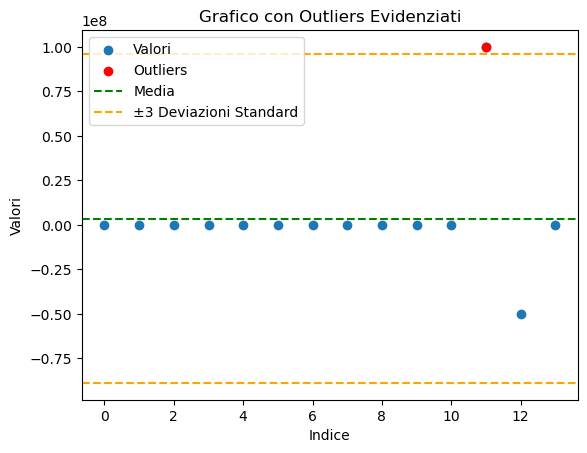

In [5]:
# Crea un grafico a dispersione
plt.scatter(df.index, df['Valori'], label='Valori')

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers['Valori'], color='red', label='Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio con 4 features
data = {'Feature1': [1, 2000, 3, 4, 50000, 10, 15, 20, 2500000, 300000000, 100000000],
        'Feature2': [2, 4, 6, 8, 10, 20, 30, 40, 50000, 60, 200],
        'Feature3': [5, 10, 15, 20000, 25, 50, 75, 100, 125, 150, 500000],
        'Feature4': [1, -20000000, 3, 4000000000, 5, 10, 15, 20, 20005, 30, 10000]}

df = pd.DataFrame(data)

# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k=2 #intervallo di confidenza 

# Lista per salvare gli indici degli outliers
outlier_indices = []

# Itera su ogni feature
for feature in df.columns:
    mean_value = df[feature].mean()
    std_dev = df[feature].std()
    
    # Identifica gli outliers per ciascuna feature
    df['Outlier_' + feature] = (df[feature] > mean_value + k * std_dev) | (df[feature] < mean_value - k * std_dev)
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4
0,1,2,5,1,False,False,False,False
1,2000,4,10,-20000000,False,False,False,False
2,3,6,15,3,False,False,False,False
3,4,8,20000,4000000000,False,False,False,True
4,50000,10,25,5,False,False,False,False
5,10,20,50,10,False,False,False,False
6,15,30,75,15,False,False,False,False
7,20,40,100,20,False,False,False,False
8,2500000,50000,125,20005,False,True,False,False
9,300000000,60,150,30,True,False,False,False


In [6]:
# Calcola il numero di features che superano la soglia per ogni riga
df['Num_Outliers'] = df.filter(like='Outlier_').sum(axis=1)

# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers = df[df['Num_Outliers'] >= min_features_threshold]

# Aggiungi una colonna che indica se il record è un outlier o meno
df['Is_Outlier'] = df.index.isin(outliers.index)

# Rimuovi colonne ausiliarie
df.drop(df.filter(like='Outlier_').columns, axis=1, inplace=True)
df.drop('Num_Outliers', axis=1, inplace=True)
df

,Valori,Is_Outlier
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
5,10,False
6,15,False
7,20,False
8,25,False
9,300,False


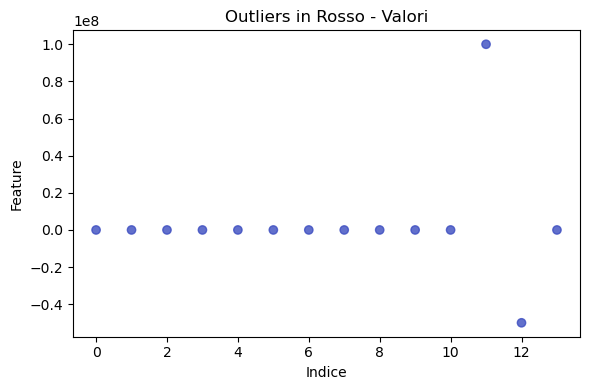

In [7]:
# Organizza i grafici in una matrice, con una colonna e 4 righe
num_features = len(df.columns) - 1  # Escludi la colonna 'Is_Outlier'
num_rows = num_features
num_cols = 1  # Una colonna

plt.figure(figsize=(6, 4 * num_rows))
for i, feature in enumerate(df.columns[:-1]):  # Escludi la colonna 'Is_Outlier'
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df.index, df[feature], c=df['Is_Outlier'], cmap='coolwarm', alpha=0.8)
    plt.title(f'Outliers in Rosso - {feature}')
    plt.xlabel('Indice')
    plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [8]:
df_filtered = df[df["Is_Outlier"]== False]
df_filtered

,Valori,Is_Outlier
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
5,10,False
6,15,False
7,20,False
8,25,False
9,300,False


# Calcolare la deviazione standard

In [1]:
def calcola_deviazione_standard(lista):
    n = len(lista)
    
    # Calcola la media
    media = sum(lista) / n
    
    # Calcola la somma dei quadrati delle differenze dalla media
    somma_quadrati_diff = sum((x - media) ** 2 for x in lista)
    
    # Calcola la deviazione standard
    deviazione_standard = (somma_quadrati_diff / n) ** 0.5
    
    return deviazione_standard

# Esempio di utilizzo
numero_lista = [1, 2, 3, 4, 5]
deviazione_standard = calcola_deviazione_standard(numero_lista)

# Stampa il risultato
print(f"La deviazione standard della lista è: {deviazione_standard}")

La deviazione standard della lista è: 1.4142135623730951
